# Importando Bibliotecas

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os


# Importando Base de Dados

In [9]:
dados = pd.read_csv('copia_target/german_credit_data.csv')

In [10]:
dados

,Unnamed: 0,ClienteID,Idade,Sexo,Trab,Habitação,Conta Poupança,Conta Corrente,Montante de credito,Duração,Objetivo,Risco
0,0,0,67,Homem,2,Propria,NaN,Pequena,1169,6,radio/TV,Bom
1,1,1,22,Mulher,2,Propria,Pequena,Moderada,5951,48,radio/TV,Ruim
2,2,2,49,Homem,1,Propria,Pequena,NaN,2096,12,Educação,Bom
3,3,3,45,Homem,2,Gratis,Pequena,Pequena,7882,42,Moveis/Equipamentos,Bom
4,4,4,53,Homem,2,Gratis,Pequena,Pequena,4870,24,Automovel,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,31,Mulher,1,Propria,Pequena,NaN,1736,12,Moveis/Equipamentos,Bom
996,996,996,40,Homem,3,Propria,Pequena,Pequena,3857,30,Automovel,Bom
997,997,997,38,Homem,2,Propria,Pequena,NaN,804,12,radio/TV,Bom
998,998,998,23,Homem,2,Gratis,Pequena,Pequena,1845,45,radio/TV,Ruim


In [11]:
# Verificando número de dados faltantes
dados.isnull().sum()

Unnamed: 0               0
ClienteID                0
Idade                    0
Sexo                     0
Trab                     0
Habitação                0
Conta Poupança         183
Conta Corrente         394
Montante de credito      0
Duração                  0
Objetivo                 0
Risco                    0
dtype: int64

In [23]:
# Renomeando colunas
dados.rename({'Unnamed: 0':'ClienteID','Age': 'Idade','Sex':'Sexo','Trab':'Emprego','Housing':\
             'Habitação','Saving accounts':'Conta Poupança','Checking account':'Conta Corrente',\
             'Credit amount':'Montante de credito','Duration':'Duração','Purpose':'Objetivo','Risk':'Risco'},axis=1,inplace=True)
          

In [24]:
dados

,ClienteID,ClienteID,Idade,Sexo,Emprego,Habitação,Conta Poupança,Conta Corrente,Montante de credito,Duração,Objetivo,Risco
0,0,0,67,Homem,2,Propria,NaN,Pequena,1169,6,radio/TV,Bom
1,1,1,22,Mulher,2,Propria,Pequena,Moderada,5951,48,radio/TV,Ruim
2,2,2,49,Homem,1,Propria,Pequena,NaN,2096,12,Educação,Bom
3,3,3,45,Homem,2,Gratis,Pequena,Pequena,7882,42,Moveis/Equipamentos,Bom
4,4,4,53,Homem,2,Gratis,Pequena,Pequena,4870,24,Automovel,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,31,Mulher,1,Propria,Pequena,NaN,1736,12,Moveis/Equipamentos,Bom
996,996,996,40,Homem,3,Propria,Pequena,Pequena,3857,30,Automovel,Bom
997,997,997,38,Homem,2,Propria,Pequena,NaN,804,12,radio/TV,Bom
998,998,998,23,Homem,2,Gratis,Pequena,Pequena,1845,45,radio/TV,Ruim


In [14]:
# Renomeando os atributos restantes com Map ou Replace
#dados['Sexo'].map({'male':'Homem', 'female':'Mulher'}) - Somente visualização

dados['Sexo'].replace(['male','female'],['Homem','Mulher'], inplace=True)
dados['Objetivo'].replace(['education','car','business','furniture/equipment',\
                          'domestic appliances','repairs','vacation/others'],\
                          ['Educação','Automovel','Negocios','Moveis/Equipamentos',\
                           'Eletrodomesticos','Reparos','Ferias/Outros'],inplace=True)
dados['Habitação'].replace(['own','free','rent'],['Propria','Gratis','Alugada'],inplace=True)
dados['Conta Poupança'].replace(['little','moderate','quite rich'],['Pequena','Moderada',\
                                                                   'Muito Rica'],inplace=True)
dados['Conta Corrente'].replace(['little','moderate','rich'],['Pequena','Moderada','Rico'],inplace=True)
dados['Risco'].replace(['good','bad'],['Bom','Ruim'],inplace= True)

In [15]:
# Mostrando os cinco primeiros atributos
dados.head()

,ClienteID,ClienteID,Idade,Sexo,Trab,Habitação,Conta Poupança,Conta Corrente,Montante de credito,Duração,Objetivo,Risco
0,0,0,67,Homem,2,Propria,NaN,Pequena,1169,6,radio/TV,Bom
1,1,1,22,Mulher,2,Propria,Pequena,Moderada,5951,48,radio/TV,Ruim
2,2,2,49,Homem,1,Propria,Pequena,NaN,2096,12,Educação,Bom
3,3,3,45,Homem,2,Gratis,Pequena,Pequena,7882,42,Moveis/Equipamentos,Bom
4,4,4,53,Homem,2,Gratis,Pequena,Pequena,4870,24,Automovel,Ruim


In [16]:
# Mostrando os cinco últimos atributos
dados.tail()

,ClienteID,ClienteID,Idade,Sexo,Trab,Habitação,Conta Poupança,Conta Corrente,Montante de credito,Duração,Objetivo,Risco
995,995,995,31,Mulher,1,Propria,Pequena,NaN,1736,12,Moveis/Equipamentos,Bom
996,996,996,40,Homem,3,Propria,Pequena,Pequena,3857,30,Automovel,Bom
997,997,997,38,Homem,2,Propria,Pequena,NaN,804,12,radio/TV,Bom
998,998,998,23,Homem,2,Gratis,Pequena,Pequena,1845,45,radio/TV,Ruim
999,999,999,27,Homem,2,Propria,Moderada,Moderada,4576,45,Automovel,Bom


In [17]:
# Fazendo cópia da base de dados
dados1= dados

In [ ]:
dados1.to_csv('copia_target/german_credit_data.csv')

In [ ]:
dados

In [ ]:
# Mostrando tipos de cada variação da base de dados
print(dados.nunique())

# Visualização dos Dados

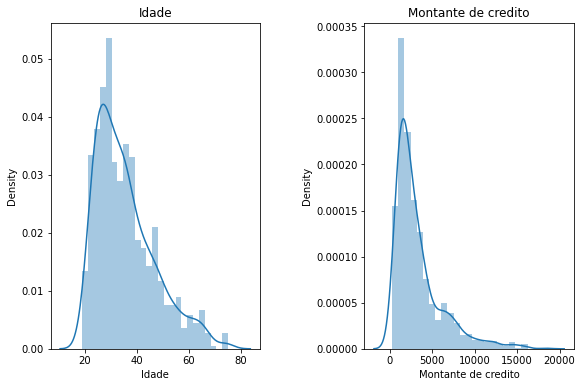

In [18]:
# Verificando a distribuição dos dados dos atributos Idade
plt.figure(1, figsize = (15, 6))
n = 0
for x in [ 'Idade','Montante de credito']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dados[x], bins = 25)
    plt.title('{}'.format(x))
plt.show()

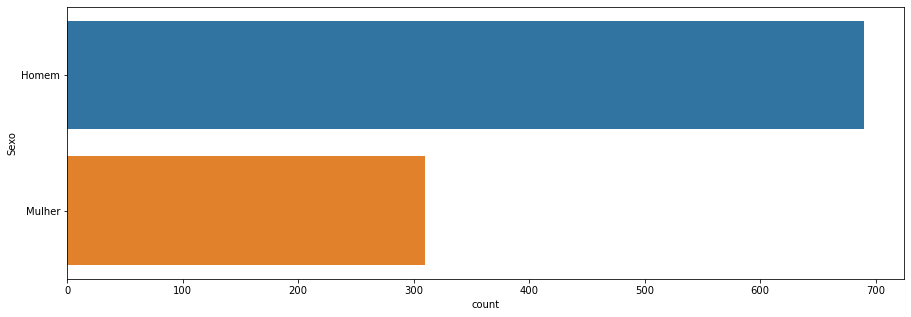

In [19]:
# Contagem de amostras de registros por sexo
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Sexo' , data= dados )
plt.show()

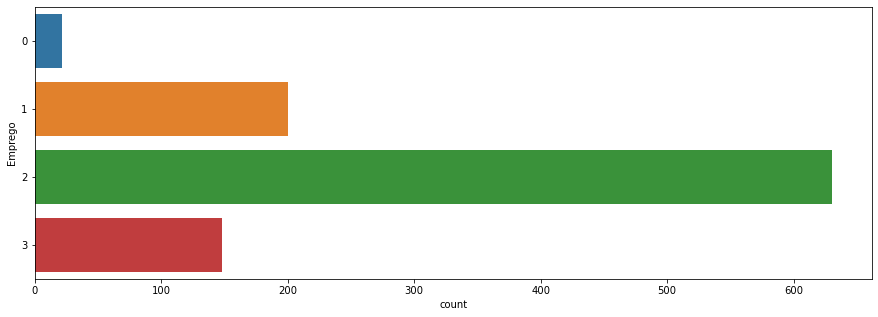

In [25]:
# Contagem de amostras de registros por Emprego
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Emprego' , data= dados )
plt.show()

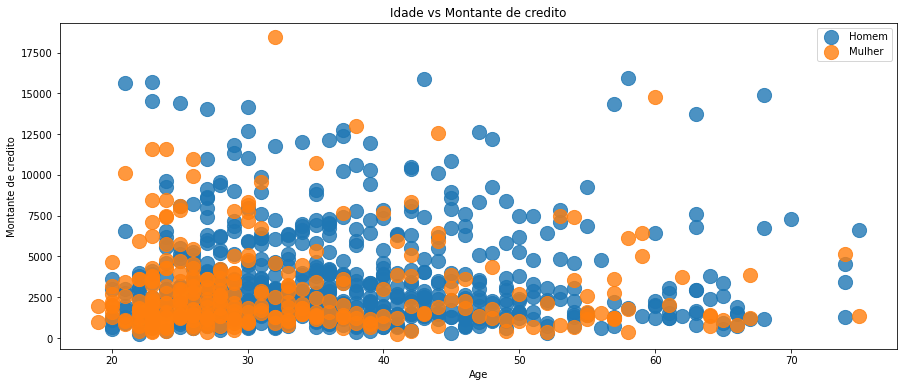

In [20]:
# Idade vs Montante de credito de homens e mulheres

plt.figure(1 , figsize= (15, 6))
for sex in ['Homem', 'Mulher']:
    plt.scatter(x ='Idade' , y = 'Montante de credito' , data = dados[dados['Sexo'] == sex],
                s = 200 , alpha = 0.8 , label = sex)
plt.xlabel('Age'),plt.ylabel('Montante de credito')
plt.title('Idade vs Montante de credito')
plt.legend()
plt.show()

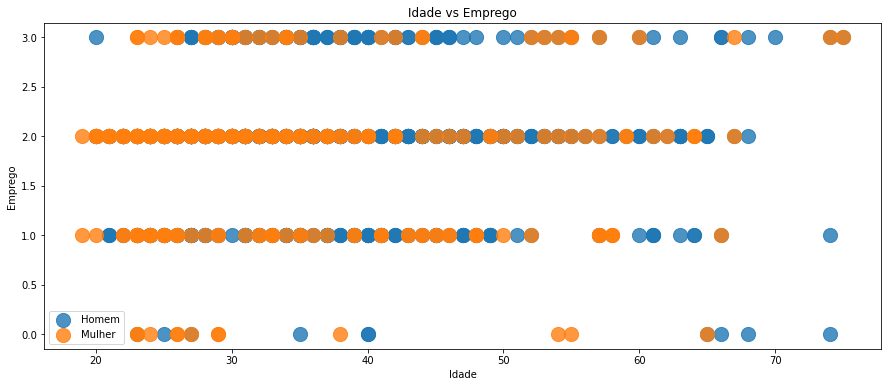

In [28]:
# Idade Vs Emprego de homens e mulheres

plt.figure(1 , figsize= (15, 6))
for sex in ['Homem', 'Mulher']:
    plt.scatter(x ='Idade' , y = 'Emprego' , data = dados[dados['Sexo'] == sex],
                s = 200 , alpha = 0.8 , label = sex)
plt.xlabel('Idade'),plt.ylabel('Emprego')
plt.title('Idade vs Emprego')
plt.legend()
plt.show()